In [144]:
import scipy.optimize as optimize
from math import atan,pi
from numpy import arange, sin, abs

def getEnergyLL(N,lamb):
    g=N*lamb
    I=[]
    if N%1==1:
        n0=-int(N/2)
    else:
        n0 = -(N-1)/2
    for n in arange(n0,n0+N,1):
        I.append(n)

    def a(P,k,g):
        out = 1
        for i in range(0,N):
            for j in range(i+1,N):
                out *=(1+1j*g/(k[P[i]]-k[P[j]]))
        return out

    def computeC(j,k):
        out = k[j]-2*pi*I[j]
        for i in range(0,N):
            out += 2*atan((k[j]-k[i])/g)
        return out

    def f(k):
        out = 0
        for j in range(0,N):
            out += (computeC(j,k))**2
        return out


    initial_guess = [x*pi for x in I]
    result = optimize.minimize(f, initial_guess)
    if result.success:
        k = result.x
        E = sum(k**2)/N/2
        
        Ps = list(itertools.permutations(range(0,N)))


        Norm = 0
        lambda0 = 0
        for P in Ps:
            lambda0+= abs(a(P,k,lamb*N))**2*(sin(k[P[1]]/2)/(k[P[1]]/2))**2
            Norm+= abs(a(P,k,lamb*N))**2

        return E, k, findDepletion(k,N,lamb)
    else:
        raise ValueError(result.message)

print('E/N = ',getEnergyLL(N=2,lamb=100.0))

E/N =  (4.743236601607978, array([-3.080012  ,  3.08001177]), 0.173997608767236)


In [145]:
import itertools

N=2
lamb=0.1
g=lamb*N

E,k, D = getEnergyLL(N,lamb)
Ps = list(itertools.permutations(range(0,N)))

def a(P,k,g):
    out = 1
    for i in range(0,N):
        for j in range(i+1,N):
            out *=(1+1j*g/(k[P[i]]-k[P[j]]))
    return out
Norm = 0
lambda0 = 0
for P in Ps:
    lambda0+= abs(a(P,k,lamb*N))**2*(sin(k[P[1]]/2)/(k[P[1]]/2))**2
    Norm+= abs(a(P,k,lamb*N))**2
    

In [146]:
print(Norm,lambda0,1-lambda0/Norm)

2.101672090345266 2.067445397062748 0.016285458345167036


In [147]:

from sympy import *
from numpy import sqrt, pi,conj, linspace,real, imag


k1=k[0]
k2=k[1]
print(k1,k2)





-0.44352093459368946 0.44352093006418036


In [150]:
def findDepletion(k,N,lamb):  #WARNING - k must be computed for choosen g!
    g=N*lamb
    if N==2:
        x1,x2,x = symbols('x1,x2,x')

        a12 = (1+(1j*g)/(k[0]-k[1]))
        a21 = (1+(1j*g)/(k[1]-k[0]))

        a12c = conj(a12)
        a21c = conj(a21)

        PsiLL = a12*exp(1j*(k[0]*x1+k[1]*x2))+ a21*exp(1j*(k[1]*x1+k[0]*x2))
        PsiLLc = a12c*exp(-1j*(k[0]*x1+k[1]*x2))+ a21c*exp(-1j*(k[1]*x1+k[0]*x2))

        G1 = (integrate(PsiLLc.subs(x1,0)*PsiLL.subs(x1,x),(x2,x,1))+integrate(PsiLLc.subs(x1,0)*(PsiLL.subs(x2,x)).subs(x1,x2),(x2,0,x))).expand()
        Norm = G1.subs(x,0)
        #print('Im(Norm)=',im(Norm.expand()),' (should be 0)')
        G1 = (G1/re(Norm.expand())).expand()
        #print('G1(0,x)=',G1)
        Λ = (integrate(G1.expand(),(x,0,1))).expand()
        #print('Re(Λ)=',re(Λ),'Im(Λ)=',im(Λ),' (should be 0)')
        return 1-re(Λ)
    return float('nan')

print(findDepletion(k,N=2,lamb=1))

0.126243850689706


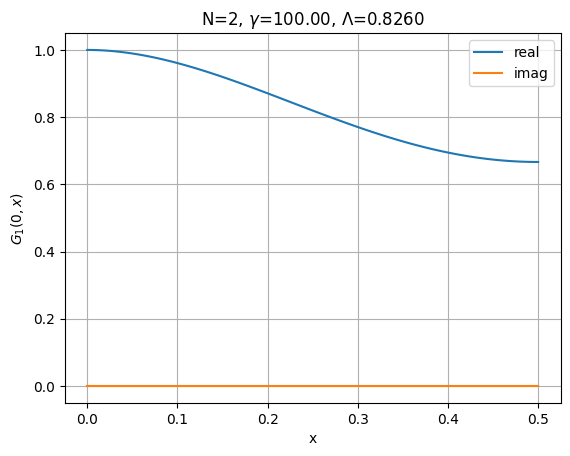

In [132]:
import matplotlib.pyplot as plt
ys = linspace(0,0.5,100)

reG1s = []
imG1s = []
for y in ys:
    reG1s.append(re(G1.subs(x,y).evalf()))
    imG1s.append(im(G1.subs(x,y).evalf()))
    
plt.plot(ys,reG1s,label='real')
plt.plot(ys,imG1s,label='imag')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$G_1(0,x)$')
plt.title('N=%i, $\gamma$=%.2f, Λ=%.4f'%(2,lamb,re(Λ)))
plt.show()
    

In [ ]:
# 3 atoms
